# マルサス

基本は放射性物質の崩壊と同じだからあっさり行こう.

\begin{align}
 \frac{dx}{dt}
 =
 \alpha u.
\end{align}
厳密解は $x(t) = C_0 e^{\alpha t}$ だ.
初期値を設定すれば $C_0$ はそこから決まる.

微分を単純に離散化すると次のようになる.

\begin{align}
 \frac{x_{n+1} - x_{n}}{h}
 =
 \alpha x_{n}.
\end{align}

整理すると次の通り.

\begin{align}
 x_{n+1}
 =
 x_{n} + \alpha h x_{n}.
\end{align}

オイラー法でコードに落とそう.

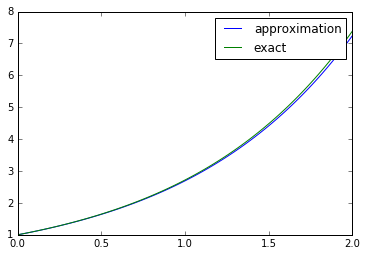

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def malthus_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    # ベクトル計算で一気に計算したい
    for i in range(1, nt):
        x[i] = x[i-1] + c * dt * x[i-1]

    return x

# 近次解
c = 1
init = 1
nt = 101
x_approx = malthus_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 放射性物質の崩壊の時との違い

`t` が大きくなると厳密解の方が少し大きくなる.
指数の肩の符号が違うだけなので放射性物質の崩壊で形式的に時間を負の方に伸ばせば同じようにズレが出てくるはずだ.
私の今の感覚だとこのズレが今回のように大きくなるように出るのかどうかまではわからない.

何はともあれ区間の分割数 `nt` を大きくしてみたのが次の結果: 具体的には 101 から 1001 にした.

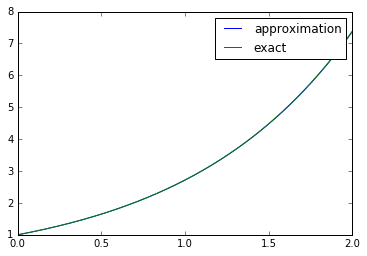

In [4]:
# 近次解
c = 1
init = 1
nt = 1001
x_approx = malthus_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

$nt = 101$ よりも近似の精度が良くなった.
この辺は単純に振る舞ってくれるようだ.

調和振動子だとオイラー法自体がうまく動かないから注意したい.

# ロジスティック方程式

方程式は次の通り.

\begin{align}
 \frac{dx}{dt}
 =
 (\alpha - \beta x) x.
\end{align}

厳密解は次の通り.

\begin{align}
 x(t)
 =
 \frac{\alpha}{\beta} \frac{1}{1 - e^{- \alpha t}}.
\end{align}

近似すると次の通り.

\begin{align}
 \frac{x_{n+1} - x_{n}}{h}
 =
 (\alpha - \beta x_{n}) x_{n}, \quad
 x_{n+1}
 =
 x_n + h (\alpha - \beta x_{n}) x_{n}.
\end{align}

では数値的に解いてみよう.
とりあえず $\alpha = 2$, $\beta = 1$ で計算している.

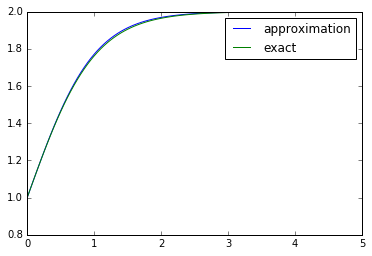

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def logistics_euler(nt, init = 10):
    dt = T / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    # ベクトル計算で一気に計算したい
    for i in range(1, nt):
        x[i] = x[i-1] + dt * (alpha - beta * x[i-1]) * x[i-1]

    return x

# 近次解
alpha = 2
beta = 1
init = 1
nt = 101
T = 5 # 時間変化を見る最大値
x_approx = logistics_euler(nt, init)
plt.plot(np.linspace(0, T, nt), x_approx)

# 厳密解
t = np.linspace(0, T, nt)
x_exact = (alpha / beta) / (1 + np.exp(- alpha * t))
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 時間の刻みを変えてみる

近似解と厳密解にちょっとズレが見える.

そこで `nt = 101` から `nt = 1001` にしてみた.

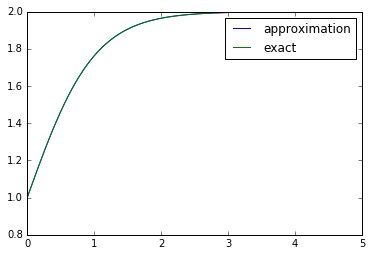

In [9]:
# 近次解
alpha = 2
beta = 1
init = 1
nt = 1001
T = 5 # 時間変化を見る最大値
x_approx = logistics_euler(nt, init)
plt.plot(np.linspace(0, T, nt), x_approx)

# 厳密解
t = np.linspace(0, T, nt)
x_exact = (alpha / beta) / (1 + np.exp(- alpha * t))
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()